# The oviposition circuit

In [2]:
from neuprint import Client

auth_token_file = open("flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    np_client.fetch_version()
except:
    np_client = None

In [ ]:
# import important stuff here
import numpy as np
import pandas as pd

import bokeh
import hvplot.pandas
import holoviews as hv

import bokeh.palettes
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [24]:
# load package
import matplotlib
import matplotlib as mpl
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'MacOSX', etc.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
%matplotlib inline

# Turn off all warnings, remove to see them
import warnings
warnings.filterwarnings('ignore')

# Set 'pdf.fonttype' to 42 to keep the text editable after exporting to pdf
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams['font.size'] = 14  # Default text size
plt.rcParams['axes.titlesize'] = 18  # Title size
plt.rcParams['figure.titlesize'] = 18  # Figure title size
plt.rcParams['axes.labelsize'] = 14  # X and Y label size
plt.rcParams['xtick.labelsize'] = 12  # X tick label size
plt.rcParams['ytick.labelsize'] = 12  # Y tick label size
plt.rcParams['legend.fontsize'] = 12  # Legend font size

These are a bunch of the oviposition neurons. I found a table of fruitless gene expressing neurons in the Scheffer paper (Appendix 1 - table 6) with some candidates for the missing oviposition cell types. 

| Fruitless gene expressing neurons |
|:--------:|
|  aDT4 (anterior DeuTocerebrum [type ID])   |
|  aIPg1-4 (anterior Inferior Protocerebrum [type ID])   |
|  aSP-f1-4, g1-3B (anterior Superior Protocerebrum [type ID])   |
|  aSP8, 10A-10C (anterior Superior Protocerebrum [type ID])    |
| pC1a-e (doublesex-expressing posterior Cells [type ID]) |
| oviDNa, b (Oviposition Descending Neuron [type ID]) |
| oviIN (Oviposition Inhibitory Neuron) |
| SAG (Sex peptide Abdominal Ganglion) |
| vpoDN (vaginal plate opening descending neuron) |
| vpoEN (vaginal plate opening excitatory neuron) |

Rhessa says she has the body ID for oviEN even though it is not labeled as that type in the Hemibrain. It has the type SMP550. From Rhessa:
> Hi, it's a bit hidden away. In the paper by Nojima et al. "A sex-specific switch between visual and olfactory inputs underlies adaptive sex differences in behavior", the caption of Figure 7 (B) says "oviEN (type: SMP550; BodyID: 452689494). Here is the link: https://www.cell.com/current-biology/fulltext/S0960-9822(20)31899-6?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0960982220318996%3Fshowall%3Dtrue

The SLP410 are thought to be the second pair of oviDNa (same paper as above. see https://doi.org/10.1016/j.cub.2020.12.047).

The SMP029 are candidates for aDN which have a role in site-selection during oviposition (Nojima et al, 2021: https://doi.org/10.1016/j.cub.2020.12.047). The same authors also speculate that SMP156 is involved in site selection (see fig.7A). Below, I will restrict the oviposition circuit to that diagrammed in the Wang et al (2020) paper.

In [4]:
from neuprint import fetch_neurons
from neuprint import NeuronCriteria as NC

# all the known oviposition neurons
#ovipos_df, roi_counts_df = fetch_neurons(NC(type=['ovi.*','pC1.*','SAG','SMP550','SLP410','SMP029','SMP156']))
ovipos_df, roi_counts_df = fetch_neurons(NC(type=['ovi.*','pC1.*','SAG','SMP550','SLP410']))
ovipos_df

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,267214250,pC1b_R,pC1b,816,3187,5440,3187,654,3805489752,Traced,False,Traced,PDM09,446.5,"[18931, 10896, 14728]","{'SNP(R)': {'pre': 547, 'post': 2474, 'downstr...",None,"[AOTU(R), AVLP(R), ICL(R), INP, SCL(R), SIP(R)...","[AVLP(R), INP, SCL(R), SIP(R), SLP(R), SMP(L),..."
1,267551639,pC1c_R,pC1c,1134,2855,9372,2855,619,2789498374,Traced,False,Traced,PDM09,371.0,"[18250, 10673, 15408]","{'SNP(R)': {'pre': 671, 'post': 1824, 'downstr...",None,"[AOTU(R), AVLP(R), CRE(-ROB,-RUB)(R), CRE(-RUB...","[AVLP(R), CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE..."
2,359744514,pC1a(PDM09)_L,pC1a,647,1604,3868,1604,360,2180467379,Traced,False,Roughly traced,None,411.0,"[33707, 11835, 14536]","{'SNP(L)': {'pre': 284, 'post': 1037, 'downstr...",None,"[INP, SCL(L), SCL(R), SIP(L), SIP(R), SLP(R), ...","[AVLP(R), INP, SCL(L), SCL(R), SIP(R), SLP(R),..."
3,392821837,pC1b(PDM09)_L,pC1b,675,1253,4671,1253,352,2352589422,Traced,False,Roughly traced,None,386.0,"[33161, 12932, 14272]","{'SNP(R)': {'pre': 319, 'post': 448, 'downstre...",None,"[INP, SCL(L), SIP(L), SMP(L), SMP(R), SNP(L), ...","[SIP(L), SMP(L), SMP(R), SNP(L), SNP(R)]"
4,423101189,oviIN_R,oviIN,6863,23029,60603,23029,2472,10033593370,Traced,False,Roughly traced,None,NaN,None,"{'SNP(R)': {'pre': 4773, 'post': 13645, 'downs...",None,"[ATL(R), CAN(R), CRE(-ROB,-RUB)(R), CRE(-RUB)(...","[CAN(R), CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(..."
5,450971893,SLP410_R,SLP410,33,859,256,859,321,1568322808,Traced,False,Roughly traced,PDM15,341.0,"[18332, 15730, 11824]","{'SNP(R)': {'pre': 1, 'post': 595, 'downstream...",None,"[AVLP(R), CA(R), CRE(-ROB,-RUB)(R), CRE(R), EP...","[AVLP(R), SIP(R), SMP(L), SNP(L), SNP(R), VLNP..."
6,452689494,SMP550_R,SMP550,1414,4831,12881,4831,555,2052918412,Traced,False,Roughly traced,PDM29,347.0,"[19511, 18367, 6016]","{'SNP(R)': {'pre': 1248, 'post': 3275, 'downst...",pSP7 candidates,"[AVLP(R), INP, LH(R), PLP(R), SCL(R), SIP(R), ...","[AVLP(R), INP, LH(R), PLP(R), SCL(R), SIP(R), ..."
7,485934965,oviIN_L,oviIN,6542,15998,58310,15998,2208,8493821787,Traced,False,Roughly traced,None,NaN,None,"{'SNP(L)': {'pre': 4184, 'post': 10529, 'downs...",None,"[ATL(L), CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(...","[ATL(L), CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(..."
8,514850616,pC1e_R,pC1e,697,2565,5433,2565,440,1624584846,Traced,False,Traced,PDM09,356.0,"[23338, 10397, 17648]","{'SNP(R)': {'pre': 387, 'post': 1777, 'downstr...",None,"[AOTU(R), AVLP(R), EPA(R), ICL(R), INP, PVLP(R...","[AOTU(R), AVLP(R), EPA(R), ICL(R), INP, PVLP(R..."
9,517587356,SAG,SAG,539,438,2538,438,310,1983011461,Traced,False,Traced,ADM09,NaN,None,"{'SNP(R)': {'pre': 289, 'post': 238, 'downstre...",None,"[SIP(L), SMP(L), SMP(R), SNP(L), SNP(R)]","[SIP(L), SMP(L), SMP(R), SNP(L), SNP(R)]"


## Connectivity within the oviposition circuit
Using the dataframe above that contains all our oviposition neurons, we pull the connections among the oviposition neurons and make a heatmap from that adjacency matrix. Note that right and left instances are included here. 

In [5]:
from neuprint import fetch_simple_connections

ovipos_conns = fetch_simple_connections(ovipos_df['bodyId'],ovipos_df['bodyId'])
ovipos_conns

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,423101189,452689494,239,oviIN,SMP550,oviIN_R,SMP550_R,"{'SNP(R)': {'pre': 239, 'post': 239}, 'SMP(R)'..."
1,485934965,579700707,164,oviIN,SMP550,oviIN_L,SMP550(PDM29)_L,"{'SNP(L)': {'pre': 164, 'post': 164}, 'SMP(L)'..."
2,5812981862,5813046951,153,SAG,pC1a,SAG,pC1a_R,"{'SNP(R)': {'pre': 123, 'post': 123}, 'SMP(R)'..."
3,5812981862,267214250,150,SAG,pC1b,SAG,pC1b_R,"{'SNP(R)': {'pre': 108, 'post': 108}, 'SMP(R)'..."
4,514850616,423101189,148,pC1e,oviIN,pC1e_R,oviIN_R,"{'SNP(R)': {'pre': 147, 'post': 148}, 'SMP(R)'..."
...,...,...,...,...,...,...,...,...
173,5813046951,550319575,1,pC1a,pC1c,pC1a_R,pC1c(PDM09)_L,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
174,5813056909,519949044,1,SLP410,oviDNb,SLP410_R,oviDNb_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SIP(R)': {'..."
175,5813063587,452689494,1,pC1d,SMP550,pC1d_R,SMP550_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."
176,5813063587,550655668,1,pC1d,oviDNa,pC1d_R,oviDNa_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SMP(R)': {'..."


In [6]:
# make a pivot table
agg_weights_df = ovipos_conns.groupby(['type_pre', 'type_post'], sort=False)['weight'].sum().reset_index()
matrix = agg_weights_df.pivot(columns='type_post', index='type_pre', values='weight')
dtype = ovipos_conns['weight'].dtype
matrix = matrix.fillna(0).astype(dtype)

In [7]:
# reorder rows of matrix
matrix = matrix.reindex(['SAG','pC1a','pC1b','pC1c','pC1d','pC1e','oviIN','SMP550','SLP410','oviDNa','oviDNb'])

# reorder columns of matrix
matrix = matrix[['SAG','pC1a','pC1b','pC1c','pC1d','pC1e','oviIN','SMP550','SLP410','oviDNa','oviDNb']]

In [8]:
matrix

type_post,SAG,pC1a,pC1b,pC1c,pC1d,pC1e,oviIN,SMP550,SLP410,oviDNa,oviDNb
type_pre,,,,,,,,,,,
SAG,21,502,340,89,9,12,2,0,0,0,1
pC1a,5,89,107,117,96,19,49,2,0,8,2
pC1b,13,3,11,9,1,0,39,0,0,0,0
pC1c,0,5,19,13,51,25,15,2,0,0,2
pC1d,0,10,12,22,29,28,223,4,1,4,0
pC1e,0,0,2,12,13,0,186,1,1,1,0
oviIN,0,1,12,320,117,69,18,669,48,70,143
SMP550,0,2,3,2,6,2,445,1,55,145,239
SLP410,1,4,0,0,0,0,0,0,0,0,2


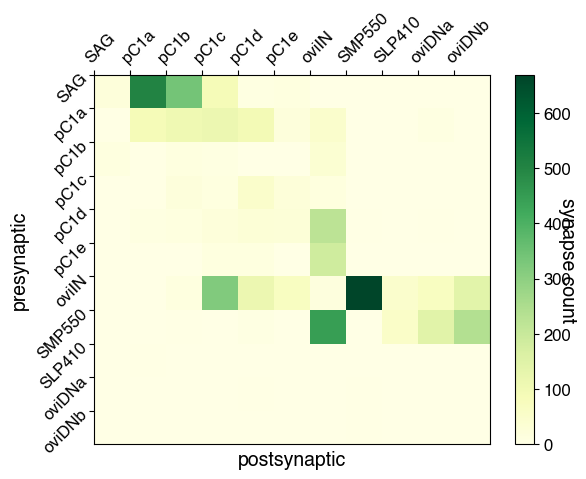

In [46]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

fig, ax = plt.subplots()
im = ax.pcolormesh(matrix)

# show all ticks and label them
ax.set_xticks(np.arange(len(matrix.columns)), labels=matrix.columns)
ax.set_yticks(np.arange(len(matrix.index)), labels=matrix.index)

# flip the y-axis so that the first row is at the top
ax.invert_yaxis()

# put xaxis at the top
ax.xaxis.set_ticks_position('top')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# label the axes
# set xlabel at the top
ax.set_xlabel('postsynaptic')
ax.set_ylabel('presynaptic')

# show colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('synapse count', rotation=-90, va="bottom")

# choose color map
cmap = mpl.cm.YlGn
im.set_cmap(cmap)

plt.show()

In [47]:
# export figure as pdf
fig.savefig("figures/oviposition_connectivity_heatmap.pdf", bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [9]:
# used the example from the neuprint tutotial to make a heatmap
matrix.index = matrix.index.astype(str)
matrix.columns = matrix.columns.astype(str)
conn_fig = matrix.hvplot.heatmap(height=600, width=700, xaxis='top', xlabel='postsynaptic', ylabel='presynaptic', clabel='synapse count', title='Connectivity among oviposition cell types', fontscale=1.5).opts(xrotation=60)
conn_fig = conn_fig.opts(invert_yaxis=True)
conn_fig

:HeatMap   [columns,index]   (value)

In [12]:
# to save the figure as an svg
from bokeh.io import export_svgs
p =  hv.render(conn_fig, backend='bokeh')
p.output_backend = "svg"
export_svgs(p, filename="figures/oviposition_connectivity_heatmap.svg")

['figures/oviposition_connectivity_heatmap.svg']

In [31]:
# to save the figure as png
hvplot.save(conn_fig, '/Users/ggutierr/My Drive (ggutierr@barnard.edu)/GitHub/oviIN-analyses-gabrielle/figures/oviposition_connectivity_heatmap.png')

## Descriptive stats for oviposition neurons
There is a big discrepancy between 2 of a cell type because one is right and the other is left and truncated. It might make more sense to only present data for the right side than a mean of both sides since n=2 is small anyway and is more likely to be inaccurate.

In [48]:
# get the right hemisphere oviposition neurons and both SAG neurons
ovipos_R_df = ovipos_df[ovipos_df['instance'].str.contains('SAG|.*_R', regex=True)].reset_index(drop=True)
#ovipos_R_df = ovipos_R_df[['bodyId','type','instance','downstream','upstream']]
ovipos_R_df = ovipos_R_df[['bodyId','type','instance','pre','post']]
ovipos_R_df

,bodyId,type,instance,pre,post
0,267214250,pC1b,pC1b_R,816,3187
1,267551639,pC1c,pC1c_R,1134,2855
2,423101189,oviIN,oviIN_R,6863,23029
3,450971893,SLP410,SLP410_R,33,859
4,452689494,SMP550,SMP550_R,1414,4831
5,514850616,pC1e,pC1e_R,697,2565
6,517587356,SAG,SAG,539,438
7,519949044,oviDNb,oviDNb_R,7,1094
8,550655668,oviDNa,oviDNa_R,36,1111
9,5812981862,SAG,SAG,659,501


Notice that there are 2 SAG neurons and 2 SLP410_R. We'll take the mean of those.

In [49]:
ovipos_R_df['type'].value_counts().to_frame().reset_index()

,type,count
0,SLP410,2
1,SAG,2
2,pC1b,1
3,pC1c,1
4,oviIN,1
5,SMP550,1
6,pC1e,1
7,oviDNb,1
8,oviDNa,1
9,pC1a,1


### input and output weights for oviposition neurons
Since I'm pretty sure that the upstream and downstream counts are bogus, use fetch_adjacencies to get the post site counts on the other side of the oviposition neurons' pre sites as well as the functional post sites on the oviposition neuron bodies.

In [50]:
from neuprint import fetch_adjacencies
n_df, conn_out_df = fetch_adjacencies(ovipos_R_df.bodyId,None,include_nonprimary=False)
n_df, conn_in_df = fetch_adjacencies(None,ovipos_R_df.bodyId,include_nonprimary=False)

In [51]:
# collapse weights 
conn_out_df = conn_out_df.groupby('bodyId_pre').agg({'weight':'sum'}).reset_index()
conn_in_df = conn_in_df.groupby('bodyId_post').agg({'weight':'sum'}).reset_index()

In [52]:
conn_out_df

,bodyId_pre,weight
0,267214250,1834
1,267551639,2640
2,423101189,29274
3,450971893,54
4,452689494,4296
5,514850616,2665
6,517587356,999
7,519949044,16
8,550655668,62
9,5812981862,1228


In [53]:
# merge conn_in_df onto ovipos_R_df
ovipos_R_df = ovipos_R_df.merge(conn_in_df, left_on='bodyId', right_on='bodyId_post', how='left')

# rename weight column
ovipos_R_df.rename(columns={'weight':'weight_in'}, inplace=True)

In [54]:
# merge conn_out_df onto ovipos_R_df
ovipos_R_df = ovipos_R_df.merge(conn_out_df, left_on='bodyId', right_on='bodyId_pre', how='left')

# rename weight column
ovipos_R_df.rename(columns={'weight':'weight_out'}, inplace=True)

In [55]:
ovipos_R_df

,bodyId,type,instance,pre,post,bodyId_post,weight_in,bodyId_pre,weight_out
0,267214250,pC1b,pC1b_R,816,3187,267214250,2927,267214250,1834
1,267551639,pC1c,pC1c_R,1134,2855,267551639,2634,267551639,2640
2,423101189,oviIN,oviIN_R,6863,23029,423101189,21624,423101189,29274
3,450971893,SLP410,SLP410_R,33,859,450971893,803,450971893,54
4,452689494,SMP550,SMP550_R,1414,4831,452689494,4485,452689494,4296
5,514850616,pC1e,pC1e_R,697,2565,514850616,2411,514850616,2665
6,517587356,SAG,SAG,539,438,517587356,364,517587356,999
7,519949044,oviDNb,oviDNb_R,7,1094,519949044,1034,519949044,16
8,550655668,oviDNa,oviDNa_R,36,1111,550655668,1055,550655668,62
9,5812981862,SAG,SAG,659,501,5812981862,389,5812981862,1228


In [56]:
# collapse the dataframe to get mean downstream and upstream synapse counts for each cell type
# could aggregate by instance instead of type to get same results but instance plot labels
#meanstream_ovipos_R_df = ovipos_R_df.groupby('type').agg({'downstream':'mean','upstream':'mean'}).reset_index()
#meanstream_ovipos_R_df = ovipos_R_df.groupby('instance').agg({'downstream':'mean','upstream':'mean'}).reset_index()
meanstream_ovipos_R_df = ovipos_R_df.groupby('instance').agg({'weight_in':'mean','weight_out':'mean'}).reset_index()
meanstream_ovipos_R_df

,instance,weight_in,weight_out
0,SAG,376.5,1113.5
1,SLP410_R,936.0,31.0
2,SMP550_R,4485.0,4296.0
3,oviDNa_R,1055.0,62.0
4,oviDNb_R,1034.0,16.0
5,oviIN_R,21624.0,29274.0
6,pC1a_R,2070.0,1786.0
7,pC1b_R,2927.0,1834.0
8,pC1c_R,2634.0,2640.0
9,pC1d_R,4210.0,4062.0


In [57]:
# reorder rows of meanstream_ovipos_R_df by instance
meanstream_ovipos_R_df = meanstream_ovipos_R_df.reindex([0,6,7,8,9,10,5,2,1,3,4])
meanstream_ovipos_R_df.reset_index(drop=True, inplace=True)

In [58]:
meanstream_ovipos_R_df

,instance,weight_in,weight_out
0,SAG,376.5,1113.5
1,pC1a_R,2070.0,1786.0
2,pC1b_R,2927.0,1834.0
3,pC1c_R,2634.0,2640.0
4,pC1d_R,4210.0,4062.0
5,pC1e_R,2411.0,2665.0
6,oviIN_R,21624.0,29274.0
7,SMP550_R,4485.0,4296.0
8,SLP410_R,936.0,31.0
9,oviDNa_R,1055.0,62.0


In [24]:
# load package after finishing up with bokeh 
import matplotlib as mpl
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'MacOSX', etc.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
%matplotlib inline

# Set 'pdf.fonttype' to 42 to keep the text editable after exporting to pdf
plt.rcParams['pdf.fonttype'] = 42

In [59]:
# sum the downstream and upstream synapse columns to get the total synapse count for each cell type
#meanstream_ovipos_R_df['sumstream'] = meanstream_ovipos_R_df['downstream'] + meanstream_ovipos_R_df['upstream']
meanstream_ovipos_R_df['sumstream'] = meanstream_ovipos_R_df['weight_out'] + meanstream_ovipos_R_df['weight_in']
meanstream_ovipos_R_df

,instance,weight_in,weight_out,sumstream
0,SAG,376.5,1113.5,1490.0
1,pC1a_R,2070.0,1786.0,3856.0
2,pC1b_R,2927.0,1834.0,4761.0
3,pC1c_R,2634.0,2640.0,5274.0
4,pC1d_R,4210.0,4062.0,8272.0
5,pC1e_R,2411.0,2665.0,5076.0
6,oviIN_R,21624.0,29274.0,50898.0
7,SMP550_R,4485.0,4296.0,8781.0
8,SLP410_R,936.0,31.0,967.0
9,oviDNa_R,1055.0,62.0,1117.0


oviIN makes more than 12 times the number of synaptic connections as the other oviposition neurons. 

In [60]:
meanstream_ovipos_R_df[meanstream_ovipos_R_df['instance']== 'oviIN_R']['sumstream']/meanstream_ovipos_R_df[meanstream_ovipos_R_df['instance']!= 'oviIN_R']['sumstream'].mean()

6    12.522882
Name: sumstream, dtype: float64

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


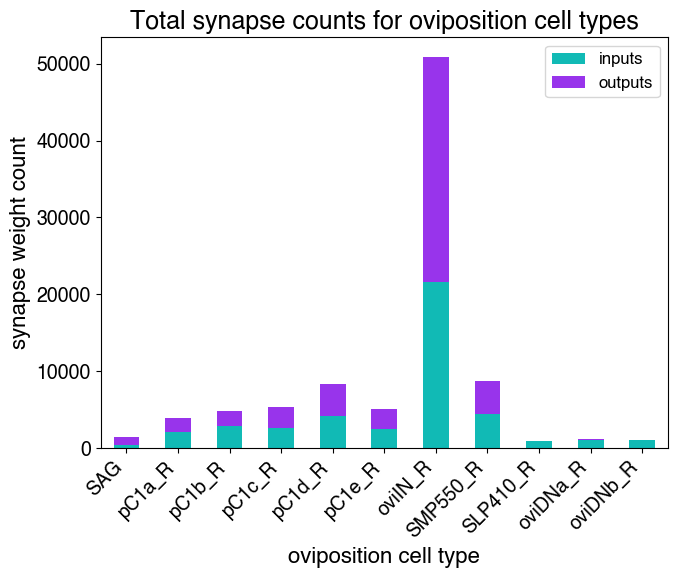

In [65]:
# figure using matplotlib
# create a bar chart of the cell types and their sumstream synapse counts
fig, ax = plt.subplots(figsize=(7,6))

#color=['#11bab5','#9834eb']

meanstream_ovipos_R_df.plot(kind='bar', x='instance', y='weight_in', ax=ax, color=['#11bab5'], legend=False)
meanstream_ovipos_R_df.plot(kind='bar', x='instance', y='weight_out', ax=ax, color=['#9834eb'], legend=False, bottom=meanstream_ovipos_R_df['weight_in'])

ax.set_ylabel('synapse weight count', fontsize=16)
ax.set_xlabel('oviposition cell type', fontsize=16)
ax.set_title('Total synapse counts for oviposition cell types', fontsize=18)
ax.set_xticklabels(meanstream_ovipos_R_df['instance'], rotation=45, ha='right', fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['inputs','outputs'], loc='upper right')
plt.tight_layout()

#plt.savefig('figures/ovipos_circ_total_syn_counts.svg', format='svg')
plt.savefig('figures/ovipos_circ_total_syn_counts.pdf', format='pdf')
plt.show()

# Proportions of synaptic connections that are with other oviposition neurons

I can get the number of synaptic connections to other oviposition neurons from the ovipos_conns dataframe. For example, if I grab all the rows for a particular instance_pre, I'll grab all the connections that instance_pre makes to postsynaptic partners within the oviposition circuit.

In [27]:
ovipos_conns[ovipos_conns['instance_pre']=='pC1c_R']

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
31,267551639,5813063587,44,pC1c,pC1d,pC1c_R,pC1d_R,"{'INP': {'pre': 8, 'post': 8}, 'SCL(R)': {'pre..."
57,267551639,514850616,19,pC1c,pC1e,pC1c_R,pC1e_R,"{'SNP(R)': {'pre': 18, 'post': 18}, 'SIP(R)': ..."
59,267551639,267214250,17,pC1c,pC1b,pC1c_R,pC1b_R,"{'INP': {'pre': 6, 'post': 6}, 'SCL(R)': {'pre..."
94,267551639,550319575,5,pC1c,pC1c,pC1c_R,pC1c(PDM09)_L,"{'SNP(R)': {'pre': 4, 'post': 4}, 'SMP(R)': {'..."
95,267551639,5813046951,5,pC1c,pC1a,pC1c_R,pC1a_R,"{'SNP(R)': {'pre': 3, 'post': 3}, 'SMP(R)': {'..."
109,267551639,423101189,3,pC1c,oviIN,pC1c_R,oviIN_R,"{'SNP(R)': {'pre': 3, 'post': 3}, 'SMP(R)': {'..."
120,267551639,452689494,2,pC1c,SMP550,pC1c_R,SMP550_R,"{'SNP(R)': {'pre': 2, 'post': 2}, 'SMP(R)': {'..."
140,267551639,485934965,1,pC1c,oviIN,pC1c_R,oviIN_L,"{'SNP(L)': {'pre': 1, 'post': 1}, 'SMP(L)': {'..."
141,267551639,519949044,1,pC1c,oviDNb,pC1c_R,oviDNb_R,"{'SNP(R)': {'pre': 1, 'post': 1}, 'SIP(R)': {'..."


I simply want to sum up those weights to get the total downstream weights in the oviposition circuit for that instance_pre neuron. That is assuming that weights correspond to counts of postsynaptic sites regardless of whether those sites are upstream or downstream, and I believe they do.

In [28]:
ovipos_conns[ovipos_conns['instance_pre']=='pC1c_R']['weight'].sum()

97

Aggregate weights by instance_pre to get the total number of synapses **to** other oviposition neurons for each cell instance. This will then be divided by the total number of downstream synapses from that instance_pre. 

In [29]:
# aggregate weights by instance_pre
ovipos_downstream_conns = ovipos_conns.groupby('instance_pre').agg({'weight':'sum'}).reset_index()
ovipos_downstream_conns

,instance_pre,weight
0,SAG,976
1,SLP410_R,7
2,SMP550(PDM29)_L,385
3,SMP550_R,515
4,oviDNa_R,8
5,oviDNb(PDM15)_L,3
6,oviDNb_R,4
7,oviIN_L,660
8,oviIN_R,807
9,pC1a(PDM09)_L,232


In [30]:
# grab only the right hemisphere and SAG neurons
ovipos_R_downstream_conns = ovipos_downstream_conns[ovipos_downstream_conns['instance_pre'].str.contains('SAG|.*_R', regex=True)].reset_index(drop=True)
ovipos_R_downstream_conns

,instance_pre,weight
0,SAG,976
1,SLP410_R,7
2,SMP550_R,515
3,oviDNa_R,8
4,oviDNb_R,4
5,oviIN_R,807
6,pC1a_R,262
7,pC1b_R,32
8,pC1c_R,97
9,pC1d_R,216


In [31]:
# merge the total output synapse counts onto this dataframe
ovipos_R_downstream_conns = ovipos_R_downstream_conns.merge(meanstream_ovipos_R_df[['instance','weight_out']], left_on='instance_pre', right_on='instance')

# get rid of the extra instance column
ovipos_R_downstream_conns = ovipos_R_downstream_conns.drop('instance', axis=1)
ovipos_R_downstream_conns

,instance_pre,weight,weight_out
0,SAG,976,1113.5
1,SLP410_R,7,31.0
2,SMP550_R,515,4296.0
3,oviDNa_R,8,62.0
4,oviDNb_R,4,16.0
5,oviIN_R,807,29274.0
6,pC1a_R,262,1786.0
7,pC1b_R,32,1834.0
8,pC1c_R,97,2640.0
9,pC1d_R,216,4062.0


In [32]:
# make a new column that is the ratio of the oviposition output synapse count to the total output synapse count
ovipos_R_downstream_conns['output ratio'] = ovipos_R_downstream_conns['weight']/ovipos_R_downstream_conns['weight_out']
ovipos_R_downstream_conns

,instance_pre,weight,weight_out,output ratio
0,SAG,976,1113.5,0.876515
1,SLP410_R,7,31.0,0.225806
2,SMP550_R,515,4296.0,0.119879
3,oviDNa_R,8,62.0,0.129032
4,oviDNb_R,4,16.0,0.250000
5,oviIN_R,807,29274.0,0.027567
6,pC1a_R,262,1786.0,0.146697
7,pC1b_R,32,1834.0,0.017448
8,pC1c_R,97,2640.0,0.036742
9,pC1d_R,216,4062.0,0.053176


Do the same for the upstream synapses. The resulting upstream ratio column will contain the proportion of upstream synapses that are from other oviposition neurons.

In [33]:
# aggregate weights by instance_post this time to get the upstream synapse counts
ovipos_upstream_conns = ovipos_conns.groupby('instance_post').agg({'weight':'sum'}).reset_index()
ovipos_upstream_conns

,instance_post,weight
0,SAG,40
1,SLP410_R,107
2,SMP550(PDM29)_L,307
3,SMP550_R,380
4,oviDNa_R,228
5,oviDNb(PDM15)_L,166
6,oviDNb_R,224
7,oviIN_L,386
8,oviIN_R,592
9,pC1a(PDM09)_L,275


In [34]:
# grab only the right hemisphere and SAG neurons
ovipos_R_upstream_conns = ovipos_upstream_conns[ovipos_upstream_conns['instance_post'].str.contains('SAG|.*_R', regex=True)].reset_index(drop=True)
ovipos_R_upstream_conns

,instance_post,weight
0,SAG,40
1,SLP410_R,107
2,SMP550_R,380
3,oviDNa_R,228
4,oviDNb_R,224
5,oviIN_R,592
6,pC1a_R,341
7,pC1b_R,410
8,pC1c_R,399
9,pC1d_R,241


In [35]:
# merge the total input synapse counts onto this dataframe
ovipos_R_upstream_conns = ovipos_R_upstream_conns.merge(meanstream_ovipos_R_df[['instance','weight_in']], left_on='instance_post', right_on='instance')

# get rid of the extra instance column
ovipos_R_upstream_conns = ovipos_R_upstream_conns.drop('instance', axis=1)
ovipos_R_upstream_conns

,instance_post,weight,weight_in
0,SAG,40,376.5
1,SLP410_R,107,936.0
2,SMP550_R,380,4485.0
3,oviDNa_R,228,1055.0
4,oviDNb_R,224,1034.0
5,oviIN_R,592,21624.0
6,pC1a_R,341,2070.0
7,pC1b_R,410,2927.0
8,pC1c_R,399,2634.0
9,pC1d_R,241,4210.0


In [36]:
# make a new column that is the ratio of the oviposition input synapse count to the total input synapse count
ovipos_R_upstream_conns['input ratio'] = ovipos_R_upstream_conns['weight']/ovipos_R_upstream_conns['weight_in']
ovipos_R_upstream_conns

,instance_post,weight,weight_in,input ratio
0,SAG,40,376.5,0.106242
1,SLP410_R,107,936.0,0.114316
2,SMP550_R,380,4485.0,0.084727
3,oviDNa_R,228,1055.0,0.216114
4,oviDNb_R,224,1034.0,0.216634
5,oviIN_R,592,21624.0,0.027377
6,pC1a_R,341,2070.0,0.164734
7,pC1b_R,410,2927.0,0.140075
8,pC1c_R,399,2634.0,0.151481
9,pC1d_R,241,4210.0,0.057245


A bar graph of this data shows that the proportions of synapses with other oviposition neurons is much smaller than for other oviposition neurons. This establishes that a large proportion of oviIN's connections are outside of the oviposition circuit. This graph is nice because it also shows the feedforward flow of information through the oviposition circuit where SAG sends more than it receives from other oviposition neurons, for example.

In [37]:
# put together a new dataframe for the purpose of making a bar plot with input and output ratios
ovipos_R_ratios = ovipos_R_upstream_conns[['instance_post','input ratio']].copy()
ovipos_R_ratios = ovipos_R_ratios.merge(ovipos_R_downstream_conns[['instance_pre','output ratio']], left_on='instance_post', right_on='instance_pre')

# get rid of the extra instance column and rename the remaining one
ovipos_R_ratios = ovipos_R_ratios.drop('instance_pre', axis=1)
ovipos_R_ratios = ovipos_R_ratios.rename(columns={'instance_post':'instance'})

In [38]:
ovipos_R_ratios

,instance,input ratio,output ratio
0,SAG,0.106242,0.876515
1,SLP410_R,0.114316,0.225806
2,SMP550_R,0.084727,0.119879
3,oviDNa_R,0.216114,0.129032
4,oviDNb_R,0.216634,0.250000
5,oviIN_R,0.027377,0.027567
6,pC1a_R,0.164734,0.146697
7,pC1b_R,0.140075,0.017448
8,pC1c_R,0.151481,0.036742
9,pC1d_R,0.057245,0.053176


In [39]:
ovipos_R_ratios = ovipos_R_ratios.reindex([0,6,7,8,9,10,5,2,1,3,4])
ovipos_R_ratios

,instance,input ratio,output ratio
0,SAG,0.106242,0.876515
6,pC1a_R,0.164734,0.146697
7,pC1b_R,0.140075,0.017448
8,pC1c_R,0.151481,0.036742
9,pC1d_R,0.057245,0.053176
10,pC1e_R,0.064289,0.081051
5,oviIN_R,0.027377,0.027567
2,SMP550_R,0.084727,0.119879
1,SLP410_R,0.114316,0.225806
3,oviDNa_R,0.216114,0.129032


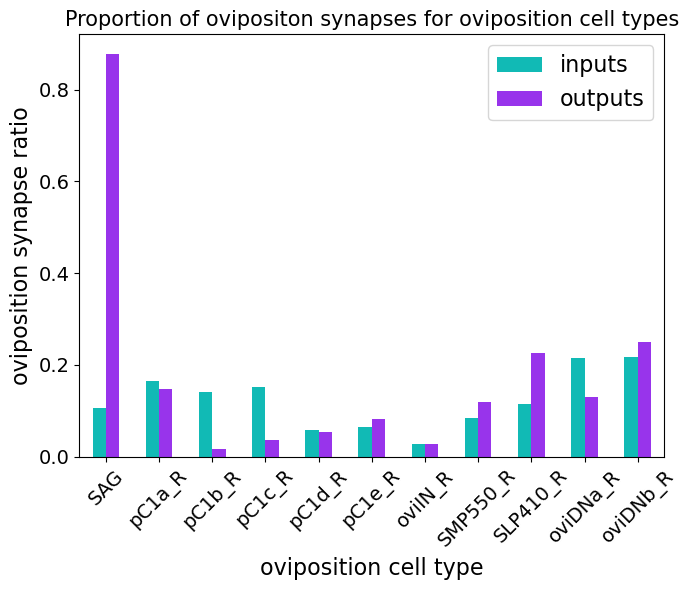

In [40]:
# figure using matplotlib
# create a bar chart of cell instances and their input and output synapse ratios
fig, ax = plt.subplots(figsize=(7,6))
ovipos_R_ratios.plot(kind='bar', x='instance', y=['input ratio','output ratio'], ax=ax, color=['#11bab5','#9834eb'])
ax.set_ylabel('oviposition synapse ratio', fontsize=16)
ax.set_xlabel('oviposition cell type', fontsize=16)
ax.set_title('Proportion of ovipositon synapses for oviposition cell types', fontsize=15)
ax.legend(['inputs','outputs'], loc='upper right', fontsize=16)
ax.set_xticklabels(ovipos_R_ratios['instance'], rotation=45, ha='center', fontsize=14)
# increase size of ytick labels
ax.yaxis.set_tick_params(labelsize=14)
plt.tight_layout()

#plt.savefig('figures/ovipos_circ_syn_ratios.pdf', format='pdf')
#plt.savefig('figures/ovipos_circ_syn_ratios.svg', format='svg')
plt.show()